## Data Science Hackathon

## Hackathon Topic :– Ecommerce Product Categorization


## Problem Statement

In the rapidly evolving world of eCommerce, accurate product categorization is crucial for ensuring seamless customer experiences, reducing search friction, and increasing product discoverability. However, the sheer volume of diverse products poses a significant challenge. Current classification systems struggle to handle ambiguities, unconventional naming conventions, and multi-language data. This hackathon aims to address these challenges by inviting participants to create innovative solutions that enhance product categorization efficiency, accuracy, and scalability.
Develop a text classification model that categorizes products with maximum accuracy based on description of the product.


**Objectives:** 
This hackathon focuses on creating accurate and efficient solutions for eCommerce product categorization. The key objectives are:

1. Data Exploration and Preparation:
   - Explore and analyze the dataset to understand key features, detect missing data, and identify ambiguities.
   - Preprocess the dataset for consistency, noise reduction, and missing value handling.

2. Descriptive Analysis:
   - Perform descriptive analysis to identify data patterns, category distributions, and inconsistencies, especially for text data.
   - Visualize data insights using word cloud and other text viz techniques. 

3. Feature Engineering/Text to Features:
   - Transform raw product data into informative features suitable for machine learning models.
   - Convert text descriptions into numerical features using techniques such as TF-IDF, word embeddings, or custom methods.

4. Predictive Modeling:
   - Design and develop machine learning models using text data for accurate product categorization.
   - Consider classification, clustering, or hybrid models based on problem requirements.
   - Ensure the model can handle ambiguous products 

5. Fine Tuning:
   - Optimize models by tuning hyperparameters and selecting relevant features.
   - Evaluate and compare models using metrics such as accuracy, F1 score, precision, and recall.
   - Validate models through cross-validation or a separate test dataset.

6. Enhance Categorization Accuracy:
   - Improve model accuracy by incorporating domain-specific knowledge or ensemble methods.
   - Ensure solutions can accurately categorize unconventional product names and handle ambiguities.
   - Develop models that support scalable, real-time categorization.


## import libraries

In [80]:
# Install required packages
!pip install wordcloud
!pip install num2words
!pip install pyspellchecker
!pip install spacy
!python -m spacy download en_core_web_sm

# Import necessary libraries
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split

import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from num2words import num2words
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

# Load spaCy model
nlp = spacy.load("en_core_web_sm")


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 325.1 kB/s eta 0:00:40
     --------------------------------------- 0.0/12.8 MB 326.8 kB/s eta 0:00:40
     --------------------------------------- 0.1/12.8 MB 491.5 kB/s eta 0:00:26
     --------------------------------------- 0.1/12.8 MB 599.1 kB/s eta 0:00:22
      -------------------------------------- 0.2/12.8 MB 748.1 kB/s eta 0:00:17
      -------------------------------------- 0.2/12.8 MB 885.4 kB/s eta 0:00:15
      -------------------------------------- 0.3/12.8 MB 948.8 kB/s eta 0:00:14
     - -------------------------------------- 0.4/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.5/12.8 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.6/12.8 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.6/12.8 MB 1

## Dataset Preparation

In [81]:
train_df = pd.read_csv(r"C:\Users\ASUS\Downloads\Hackathon\train_product_data.csv")

In [82]:
train_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [83]:
train_df.describe()

,retail_price,discounted_price
count,14942.000000,14942.000000
mean,3128.424040,2087.732298
std,9154.463342,7712.247869
min,35.000000,35.000000
25%,699.000000,349.000000
50%,1000.000000,499.000000
75%,1989.750000,999.000000
max,571230.000000,571230.000000


In [84]:
train_df['description'].shape

(14999,)

In [85]:
train_df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 57
discounted_price             57
image                         3
is_FK_Advantage_product       0
description                   1
product_rating                0
overall_rating                0
brand                      4710
product_specifications        6
dtype: int64

In [86]:
labels=train_df['product_category_tree'].unique()

In [87]:
train_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [88]:
train_df['description'].iloc[0]

"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts"

In [89]:
train_df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 57
discounted_price             57
image                         3
is_FK_Advantage_product       0
description                   1
product_rating                0
overall_rating                0
brand                      4710
product_specifications        6
dtype: int64

In [90]:
train_df.duplicated().sum()

0

In [91]:
train_df.dropna(inplace = True) # Dropping observations with missing values
train_df.drop_duplicates(inplace = True) # Dropping duplicate observations
train_df.reset_index(drop = True, inplace = True) # Resetting index

In [92]:
train_df.isnull().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

In [93]:
train_df.duplicated().sum()

0

In [94]:
train_df.to_csv('product_clean_description.csv')

In [95]:
train_df['product_category_tree'].unique()

array(['Clothing ', 'Footwear ', 'Pens & Stationery ',
       'Bags, Wallets & Belts ', 'Home Decor & Festive Needs ',
       'Automotive ', 'Tools & Hardware ', 'Baby Care ',
       'Mobiles & Accessories ', 'Toys & School Supplies ', 'Jewellery ',
       'Kitchen & Dining ', 'Computers ', 'Watches '], dtype=object)

In [96]:
train_df['product_category_tree'].nunique()

14

In [97]:
category_mapping = {
    'Clothing ': 0,
    'Footwear ': 1,
    'Pens & Stationery ': 2,
    'Bags, Wallets & Belts ': 3,
    'Home Decor & Festive Needs ': 4,
    'Automotive ': 5,
    'Tools & Hardware ': 6,
    'Baby Care ': 7,
    'Mobiles & Accessories ': 8,
    'Watches ': 9,
    'Toys & School Supplies ': 10,
    'Jewellery ': 11,
    'Kitchen & Dining ': 12,
    'Computers ': 13
}

In [98]:
train_df['product_category_encoded'] = train_df['product_category_tree'].map(category_mapping)

## Exploratory data analysis

In [99]:
train_df['description_len'] = train_df['description'].apply(lambda x: len(x.split(' ')))
train_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_category_encoded,description_len
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",0,64
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",1,107
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",0,63
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",0,65
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",...",1,64


**Description lengths across categories**

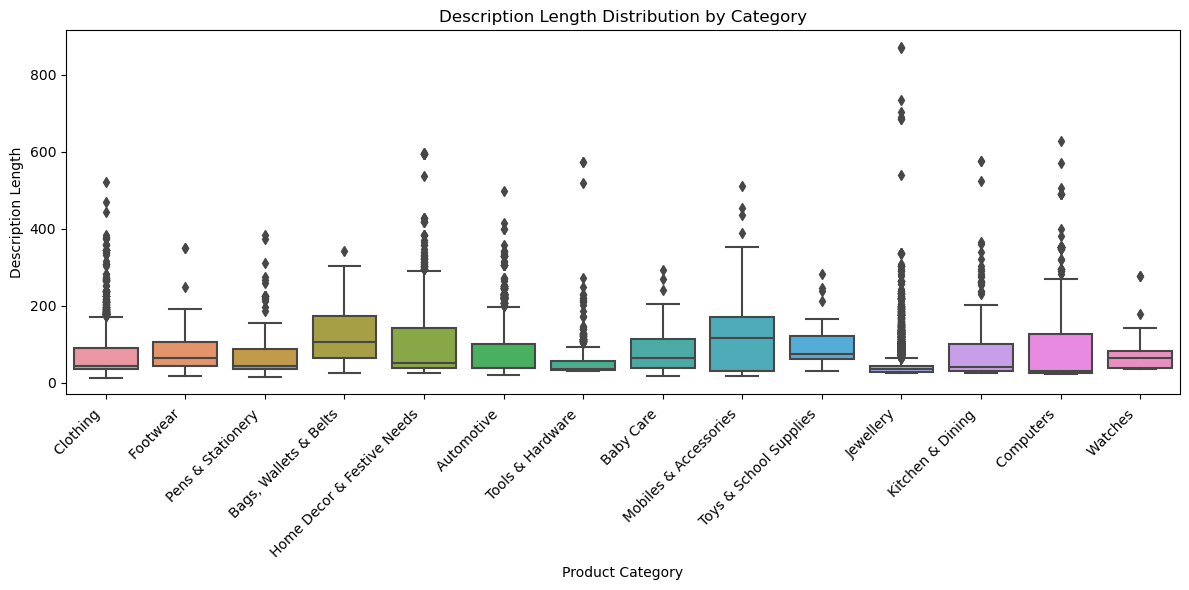

In [100]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category_tree', y='description_len', data=train_df)
plt.title('Description Length Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Description Length')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Descriptions for products in the "Mobiles & Accessories" category tend to be the longest, followed by "Kitchens & Dining" and "Computers." Descriptions for products in the "Clothing" ,"watches" and "Footwear" categories tend to be on the shorter side.

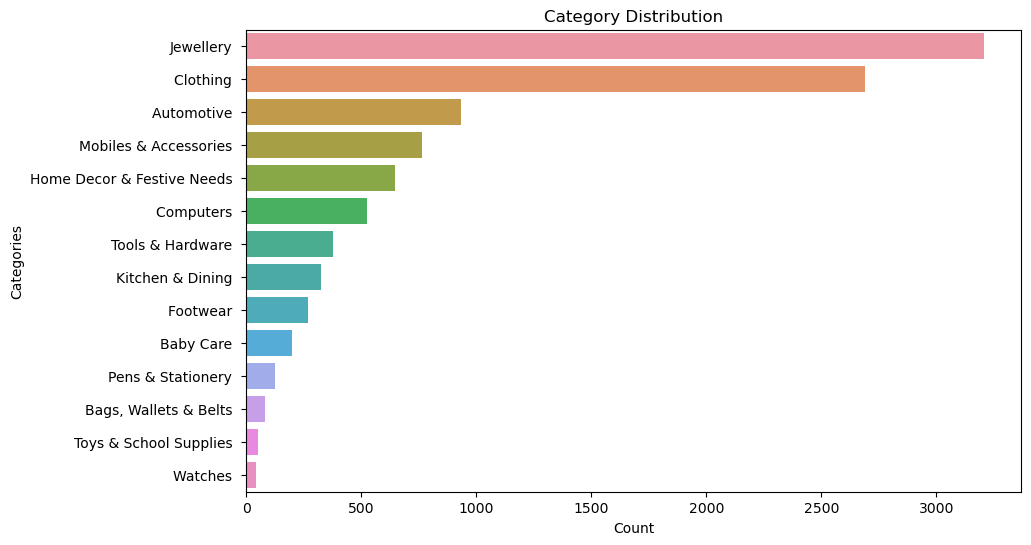

In [101]:
plt.figure(figsize=(10, 6))
sns.countplot(y="product_category_tree", data=train_df, order=train_df['product_category_tree'].value_counts().index)
plt.title('Category Distribution')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.show()

Dataset contains more categories of “Clothing” followed by "Jewellery" and "Footwear", this implies that customers are more interested in buying this products probably female customers

##  Text Normalization

In [102]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

**Converting to Lowercase**

In [103]:
# Converting to lowercase
def convert_to_lowercase(text):
    return text.lower()

text = "This is a HACKATHON oN Nlp Problem STAtement"
print("Input: {}".format(text))
print("Output: {}".format(convert_to_lowercase(text)))

Input: This is a HACKATHON oN Nlp Problem STAtement
Output: this is a hackathon on nlp problem statement


**Removal of Whitespaces**

In [104]:
# Removing whitespaces
def remove_whitespace(text):
    return text.strip()

text = " \t This is a string \t "
print("Input: {}".format(text))
print("Output: {}".format(remove_whitespace(text)))

Input:  	 This is a string 	 
Output: This is a string


**Removal of Punctuations**

In [105]:
# Removing punctuations
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") # discarding apostrophe from the string to keep the contractions intact
    return text.translate(str.maketrans("", "", punct_str))

text = "Here's [an] example? {of} &a string. with.? (punctuations)!!!!"
print("Input: {}".format(text))
print("Output: {}".format(remove_punctuation(text)))

Input: Here's [an] example? {of} &a string. with.? (punctuations)!!!!
Output: Here's an example of a string with punctuations


**Removal of Unicode Characters**

In [106]:
# Removing HTML tags
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

text = '<a href = "https://www.xyz.com/abc/qwert"> Ecommerce Product Categorization</a>'
print("Input: {}".format(text))
print("Output: {}".format(remove_html(text)))

Input: <a href = "https://www.xyz.com/abc/qwert"> Ecommerce Product Categorization</a>
Output:  Ecommerce Product Categorization


In [107]:
# Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

text = "This innovative hd printing technique results in durable and spectacular looking prints 😊"
print("Input: {}".format(text))
print("Output: {}".format(remove_emoji(text)))

Input: This innovative hd printing technique results in durable and spectacular looking prints 😊
Output: This innovative hd printing technique results in durable and spectacular looking prints 


In [108]:
# Removing other unicode characters
def remove_http(text):
    http = "https?://\S+|www\.\S+" # matching strings beginning with http (but not just "http")
    pattern = r"({})".format(http) # creating pattern
    return re.sub(pattern, "", text)

text = "It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols"
print("Input: {}".format(text))
print("Output: {}".format(remove_http(text)))

Input: It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols
Output: It's a function that removes links starting with http: or https such as 


**Removal of Stop Words**

In [109]:
import nltk

# Download the stopwords dataset
nltk.download('stopwords')

# Import the stopwords from NLTK
from nltk.corpus import stopwords

# Stopwords
stops = stopwords.words("english")  # stopwords

# Common words in English
alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", 
             "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]

# Prepositions
prepositions = ["about", "above", "across", "after", "against", "among", 
                "around", "at", "before", "behind", "below", "beside", "between",
                "by", "down", "during", "for", "from", "in", "inside", "into", "near", 
                "of", "off", "on", "out", "over", "through", "to", "toward", "under",
                "up", "with"]

# Less common prepositions
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but",
                            "concerning", "considering", "despite", "except", "following",
                            "like", "minus", "onto", "outside", "per", "plus", "regarding", 
                            "round", "since", "than", "till", "underneath", "unlike", 
                            "until", "upon", "versus", "via", "within", "without"]

# Coordinating conjunctions
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]

# Correlative conjunctions
correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not",
                            "only", "but", "whether", "or"]

# Subordinating conjunctions
subordinating_conjunctions = ["after", "although", "as", "as if", "as long as", "as much as",
                              "as soon as", "as though", "because", "before", "by the time",
                              "even if", "even though", "if", "in order that", "in case", 
                              "in the event that", "lest", "now that", "once", "only", "only if",
                              "provided that", "since", "so", "supposing", "that", "than", 
                              "though", "till", "unless", "until", "when", "whenever", "where", 
                              "whereas", "wherever", "whether or not", "while"]

# Other words
others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", 
          "ûªs", "ûówe"]

# Additional stopwords
addstops = ["among","get", "onto", "shall", "thrice", "thus", "twice", "unto", "us", 
            "would"]

# Common words in ecommerce contexts
common_ecommerce_words = ["shop", "shops", "shopping","buy","genuine","product",
                          "store", "stores", "day","replacement","good","description",
                           "purchase", "purchases", "checkout", "cart", "details","detail",
                           "discount", "discounts", "offer", "offers", "specification",
                           "deal", "deals", "sale", "sales", "item","items",
                           "voucher", "vouchers", "coupon", "coupons", 
                           "promo", "promos", "promotion", "promotions", 
                           "buying", "selling", "seller", "sellers", 
                           "buyer", "buyers", "payment", "payments", 
                           "checkout","free", "order", "orders","available", 
                           "return", "returns", "exchange", "exchanges", 
                           "refund", "refunds", "customer", "customers", 
                           "service", "services", "support", "feedback", 
                           "review", "reviews", "rating", "ratings", 
                           "online", "offline", "delivery", "shipping", 
                           "shipped", "ship", "track", "tracking","cash", 
                           "payment", "prices","price","rs.","rs","select","selected",
                           "transaction", "transactions", "secure", "key","feature","features",
                           "guarantee", "guaranteed", "fast", "quick", 
                           "easy", "convenient", "reliable", "trustworthy", 
                           "safe", "secure", "doorstep", "discounted", 
                           "affordable", "cheap", "low", "high", "best", 
                           "popular", "top", "quality", "brand", "brands", 
                            "stock","new", "latest", "trending", "hot", "exclusive"]

# since it is product categorization, platforms names won't help
ecommerce_platforms = ["flipkart", "amazon", "mintra","snapdeal"]

# Combine all stopwords into one list
allstops = stops + alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions + others + addstops + common_ecommerce_words + ecommerce_platforms

print(allstops)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [110]:
# Function to remove stopwords from a list of texts
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])

text = "shop the latest collection of premium quality fashion accessories. get discounts on selected items. free shipping on orders over rs.50. limited stock available."
print("Input: {}".format(text))
print("Output: {}".format(remove_stopwords(text)))

Input: shop the latest collection of premium quality fashion accessories. get discounts on selected items. free shipping on orders over rs.50. limited stock available.
Output: collection premium fashion accessories 50 limited


**Spelling Correction**

In [111]:
# pyspellchecker
spell = SpellChecker()

def pyspellchecker(text):
    word_list = regexp.tokenize(text)
    word_list_corrected = []
    for word in word_list:
        if word in spell.unknown(word_list):
            word_corrected = spell.correction(word)
            if word_corrected == None:
                word_list_corrected.append(word)
            else:
                word_list_corrected.append(word_corrected)
        else:
            word_list_corrected.append(word)
    text_corrected = " ".join(word_list_corrected)
    return text_corrected

text = "womon watch for limitad offar"
print("Input: {}".format(text))
print("Output: {}".format(pyspellchecker(text)))

Input: womon watch for limitad offar
Output: woman watch for limited offer


**Stemming and Lemmatization**

In [112]:
# Stemming
stemmer = PorterStemmer()
def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem

text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_stemmer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduc lemmat as an improv over stem


In [113]:
# Lemmatization
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
#lemmatizer = WordNetLemmatizer()

def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    #text_wordnet = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) # regexp.tokenize(text)
    return text_spacy
    #return text_wordnet

text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_lemmatizer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduce lemmatization as an improvement over stem


**Discardment of Non-alphabetic Words**

In [114]:
# Discardment of non-alphabetic words
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

text = "It is a watch of Rs.1000"
print("Input: {}".format(text))
print("Output: {}".format(discard_non_alpha(text)))

Input: It is a watch of Rs.1000
Output: It is a watch of Rs


**Retainment of Relevant Parts of Speech**

In [115]:
import nltk

# Download the necessary NLTK data
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Import the required NLTK components
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize

# Define the function to keep specific POS tags
def keep_pos(text):
    # Tokenize the text
    tokens = regexp_tokenize(text, pattern=r'\w+')
    
    # Tag the tokens with POS tags
    tokens_tagged = nltk.pos_tag(tokens)
    
    # Define the POS tags to keep
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS',   # Nouns
                 'JJ', 'JJR', 'JJS',          # Adjectives
                 'RB', 'RBR', 'RBS',          # Adverbs
                 'VB', 'VBD', 'VBG', 'VBN',   # Verbs
                 'FW']                        # Foreign words
    
    # Keep words with specified POS tags
    keep_words = [x[0] for x in tokens_tagged if x[1] in keep_tags]
    
    # Join the kept words into a string
    return " ".join(keep_words)

# Example product description
product_description = "This stylish red dress is perfect for parties and special occasions. Made with high-quality fabric, it features a flattering fit and flare silhouette. Pair it with heels and statement jewelry for a stunning look."

# Apply the keep_pos function to the product description
filtered_description = keep_pos(product_description)

print("Input: {}".format(product_description))
print("Output: {}".format(filtered_description))


Input: This stylish red dress is perfect for parties and special occasions. Made with high-quality fabric, it features a flattering fit and flare silhouette. Pair it with heels and statement jewelry for a stunning look.
Output: stylish red dress perfect parties special occasions Made high quality flattering fit flare silhouette Pair heels statement jewelry stunning look


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Let's apply on the data**

In [116]:
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Ensure NLTK data is downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Define the text normalizer function
def text_normalizer(text):
    if not isinstance(text, str):
        text = ""
        
    # Tokenize the text
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text.lower())
    
    # Tag the tokens with POS tags
    tokens_tagged = nltk.pos_tag(tokens)
    
    # Define the POS tags to keep
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS',   # Nouns
                 'JJ', 'JJR', 'JJS',           # Adjectives
                 'RB', 'RBR', 'RBS',           # Adverbs
                 'VB', 'VBD', 'VBG', 'VBN',    # Verbs
                 'FW']                         # Foreign words
    
    # Keep words with specified POS tags
    keep_words = [word for word, tag in tokens_tagged if tag in keep_tags]
    
    # Remove stopwords
    stops = set(stopwords.words('english'))
    keep_words = [word for word in keep_words if word not in stops]
    
    # Join the kept words into a string
    return " ".join(keep_words)

# Load your dataset
train_df = pd.read_csv(r"C:\Users\ASUS\Downloads\Hackathon\train_product_data.csv")

# Ensure all descriptions are strings
train_df['description'] = train_df['description'].astype(str)

# Apply the text normalizer to the description column
train_df['normalized_description'] = train_df['description'].apply(text_normalizer)

print(train_df[['description', 'normalized_description']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                         description  \
0  Key Features of Alisha Solid Women's Cycling S...   
1  Key Features of AW Bellies Sandals Wedges Heel...   
2  Key Features of Alisha Solid Women's Cycling S...   
3  Key Features of Alisha Solid Women's Cycling S...   
4  Key Features of dilli bazaaar Bellies, Corpora...   

                              normalized_description  
0  key features alisha solid women cycling shorts...  
1  key features aw bellies sandals wedges casuals...  
2  key features alisha solid women cycling shorts...  
3  key features alisha solid women cycling shorts...  
4  key features dilli bazaaar bellies corporate c...  


In [117]:
train_df[['description','normalized_description']]

,description,normalized_description
0,Key Features of Alisha Solid Women's Cycling S...,key features alisha solid women cycling shorts...
1,Key Features of AW Bellies Sandals Wedges Heel...,key features aw bellies sandals wedges casuals...
2,Key Features of Alisha Solid Women's Cycling S...,key features alisha solid women cycling shorts...
3,Key Features of Alisha Solid Women's Cycling S...,key features alisha solid women cycling shorts...
4,"Key Features of dilli bazaaar Bellies, Corpora...",key features dilli bazaaar bellies corporate c...
...,...,...
14994,TheLostPuppy Back Cover for Apple iPad Air (Mu...,thelostpuppy back cover apple ipad air multico...
14995,Kenway Retail Brass Copper Cuff\n ...,kenway retail brass copper cuff price rs sultr...
14996,TheLostPuppy Back Cover for Apple iPad Air 2 (...,thelostpuppy back cover apple ipad air multico...
14997,Kenway Retail Brass Copper Cuff\n ...,kenway retail brass copper cuff price rs hot s...


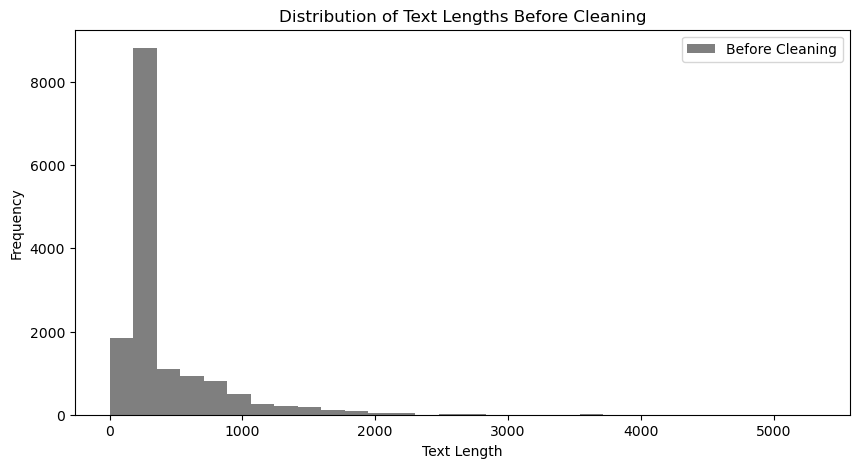

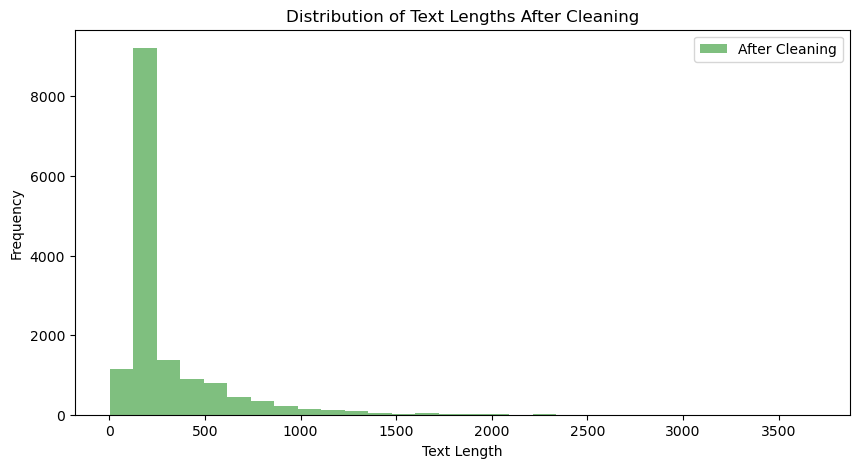

In [118]:
# Before cleaning
plt.figure(figsize=(10, 5))
plt.hist(train_df['description'].str.len(), bins=30, color='black', alpha=0.5, label='Before Cleaning')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths Before Cleaning')
plt.legend()
plt.show()

# After cleaning
plt.figure(figsize=(10, 5))
plt.hist(train_df['normalized_description'].str.len(), bins=30, color='green', alpha=0.5, label='After Cleaning')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths After Cleaning')
plt.legend()
plt.show()

In [119]:
# Calculating average text lengths before and after cleaning
avg_text_length_before = train_df['description'].str.len().mean()
avg_text_length_after = train_df['normalized_description'].str.len().mean()

# Calculating the percentage reduction in text length
percentage_reduction = ((avg_text_length_before - avg_text_length_after) / avg_text_length_before) * 100

print("Percentage reduction in text length after cleaning: {:.2f}%".format(percentage_reduction))

Percentage reduction in text length after cleaning: 27.10%


The cleaning process applied to the text data has resulted in a significant reduction in text length, with an average reduction of approximately 27.10%. This reduction indicates that the cleaning techniques effectively removed extraneous content, noise, punctuation, stopwords, and other irrelevant information from the text data.

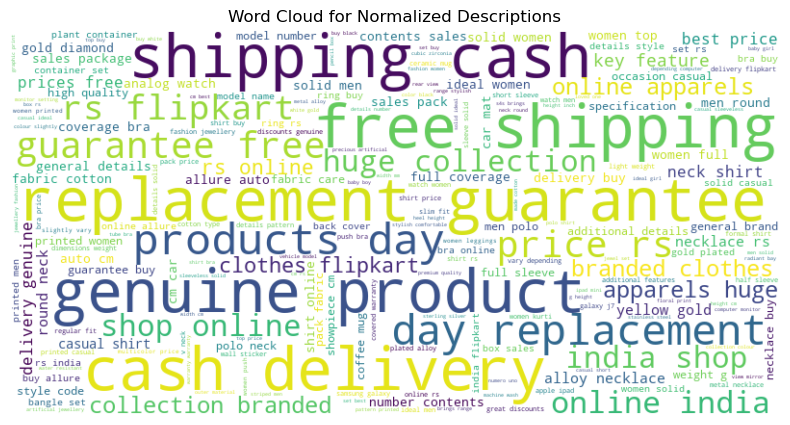

In [120]:
text = " ".join(description for description in train_df['normalized_description'])

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud for Normalized Descriptions')
plt.show()

##  Train Validation Split

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import RegexpTokenizer
import nltk

# Download NLTK data if not already available
nltk.download('punkt')

# Load the dataset
train_df = pd.read_csv(r"C:\Users\ASUS\Downloads\Hackathon\train_product_data.csv")

# Check the columns to identify the correct category column
print(train_df.columns)

# Define the text normalizer function
def text_normalizer(text):
    if pd.isna(text):  # Check for missing values
        return ''
    tokenizer = RegexpTokenizer(r'\w+')
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    return ' '.join(tokens)

# Create the 'normalized_description' column
train_df['normalized_description'] = train_df['description'].apply(text_normalizer)

# Encode the target variable if it's not already encoded
if 'product_category_encoded' not in train_df.columns:
    label_encoder = LabelEncoder()
    train_df['product_category_encoded'] = label_encoder.fit_transform(train_df['product_category_tree'])

# Define features and target variable
X = train_df['normalized_description']
y = train_df['product_category_encoded']

# Perform the train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Print the size of each split
print("Training data:", len(X_train), len(y_train))
print("Validation data:", len(X_val), len(y_val))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')
Training data: 11999 11999
Validation data: 3000 3000


**Test-data Setup**

In [122]:
test_df = pd.read_csv(r"C:\Users\ASUS\Downloads\Hackathon\test_data.csv")

In [123]:
print("Testing data without label: ",test_df.shape)

Testing data without label:  (2534, 14)


In [124]:
X_test = test_df['description'].apply(text_normalizer)

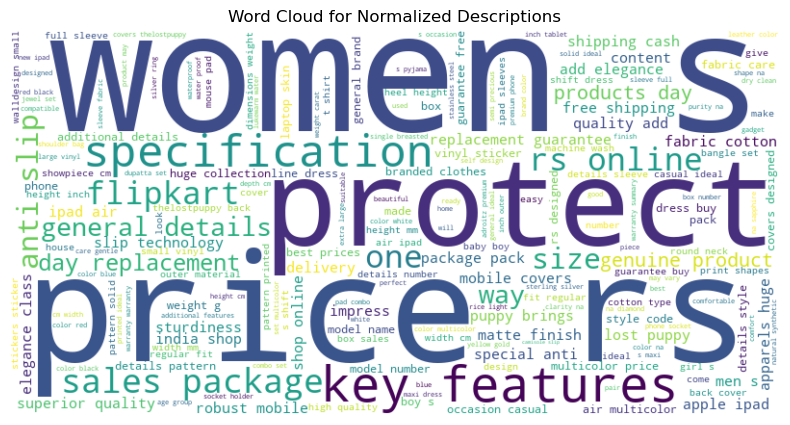

In [125]:
from wordcloud import WordCloud

text = " ".join(description for description in X_test)

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud for Normalized Descriptions')
plt.show()

## TF-IDF Model

In [126]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [127]:
# TF-IDF vectorization
TfidfVec = TfidfVectorizer(ngram_range = (1, 1))
X_train_tfidf = TfidfVec.fit_transform(X_train)
X_val_tfidf = TfidfVec.transform(X_val)
X_test_tfidf = TfidfVec.transform(X_test)

In [128]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score

**TF-IDF Baseline Modeling**

In [129]:
# Classifiers
names = [
    "MultinomialNB",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "SGD Classifier",
    "Ridge Classifier",
    "XGBoost",
    "AdaBoost",
]

models = [
    MultinomialNB(),
    KNeighborsClassifier(n_neighbors = 149, n_jobs = -1),
    DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    SGDClassifier(loss = 'hinge'),
    RidgeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier()
]

In [130]:
# Function to return summary of baseline models
def score(X_train, y_train, X_val, y_val, names = names, models = models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    for model in models:
        model.fit(X_train, y_train)
        y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))
    
    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    return score_df

In [131]:
# Summary of baseline models
score(X_train_tfidf, y_train, X_val_tfidf, y_val, names = names, models = models)

,Classifier,Training accuracy,Validation accuracy
3,Linear SVM,0.995000,0.984333
5,SGD Classifier,0.992916,0.984333
6,Ridge Classifier,0.996166,0.983000
7,XGBoost,0.999583,0.974667
4,Random Forest,0.999667,0.955000
2,Decision Tree,0.999667,0.954333
1,KNN Classifier,0.892991,0.889333
0,MultinomialNB,0.889907,0.868000
8,AdaBoost,0.556046,0.544000


The Ridge Classifier, SGD Classifier, and Linear SVM stand out with high training and validation accuracies. This indicates that these models are robust and generalize well to new data, making them the best choices for this task.

**TF-IDF Hyperparameter Tuning**

We will perform hyperparameter tuning on the best performing baseline model.

In [132]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='accuracy', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid.
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters.
    The combination with the highest accuracy for each class is selected as the default scoring metric.
    The function returns the classifier with the optimal hyperparameters.
    '''

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [133]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,roc_auc_score,confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [134]:
# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10, 100],        # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'], # Solvers
    'class_weight':[None, 'balanced']                 # Whether to normalize the input features
}

In [135]:
best_ridge, best_hyperparams = tune_clf_hyperparameters(RidgeClassifier(), param_grid, X_train_tfidf, y_train)
print('Optimal Hyperparameters: \n',  best_hyperparams)

Optimal Hyperparameters: 
 {'alpha': 0.1, 'class_weight': 'balanced', 'solver': 'auto'}


**Evaluation**

In [136]:
# Reverse the category mapping to map numeric labels back to category names
reverse_category_mapping = {v: k.strip() for k, v in category_mapping.items()}

def map_labels(y, reverse_mapping):
    return [reverse_mapping[label] for label in y]

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Map numeric labels to category names
    y_train_mapped = map_labels(y_train, reverse_category_mapping)
    y_test_mapped = map_labels(y_test, reverse_category_mapping)

    # Predict using the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Map numeric predictions to category names
    y_train_pred_mapped = map_labels(y_train_pred, reverse_category_mapping)
    y_test_pred_mapped = map_labels(y_test_pred, reverse_category_mapping)

    # Evaluate the model on the train data
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train_mapped, y_train_pred_mapped))

    # Evaluate the model on the test data
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test_mapped, y_test_pred_mapped))

    # Generate confusion matrix
    cm = confusion_matrix(y_test_mapped, y_test_pred_mapped, labels=list(reverse_category_mapping.values()))

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(14, 14))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=list(reverse_category_mapping.values()), 
                yticklabels=list(reverse_category_mapping.values()))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.show()


	  Classification report for training set
-------------------------------------------------------
                            precision    recall  f1-score   support

                Automotive       1.00      1.00      1.00       866
                 Baby Care       1.00      1.00      1.00      2574
     Bags, Wallets & Belts       1.00      1.00      1.00      4253
                  Clothing       1.00      1.00      1.00       750
                 Computers       1.00      1.00      1.00       421
                  Footwear       0.97      1.00      0.98       179
Home Decor & Festive Needs       1.00      1.00      1.00       425
                 Jewellery       1.00      1.00      1.00       303
          Kitchen & Dining       0.99      1.00      0.99       217
     Mobiles & Accessories       1.00      1.00      1.00       488
         Pens & Stationery       1.00      1.00      1.00       127
          Tools & Hardware       1.00      1.00      1.00       571
    Toys & Schoo

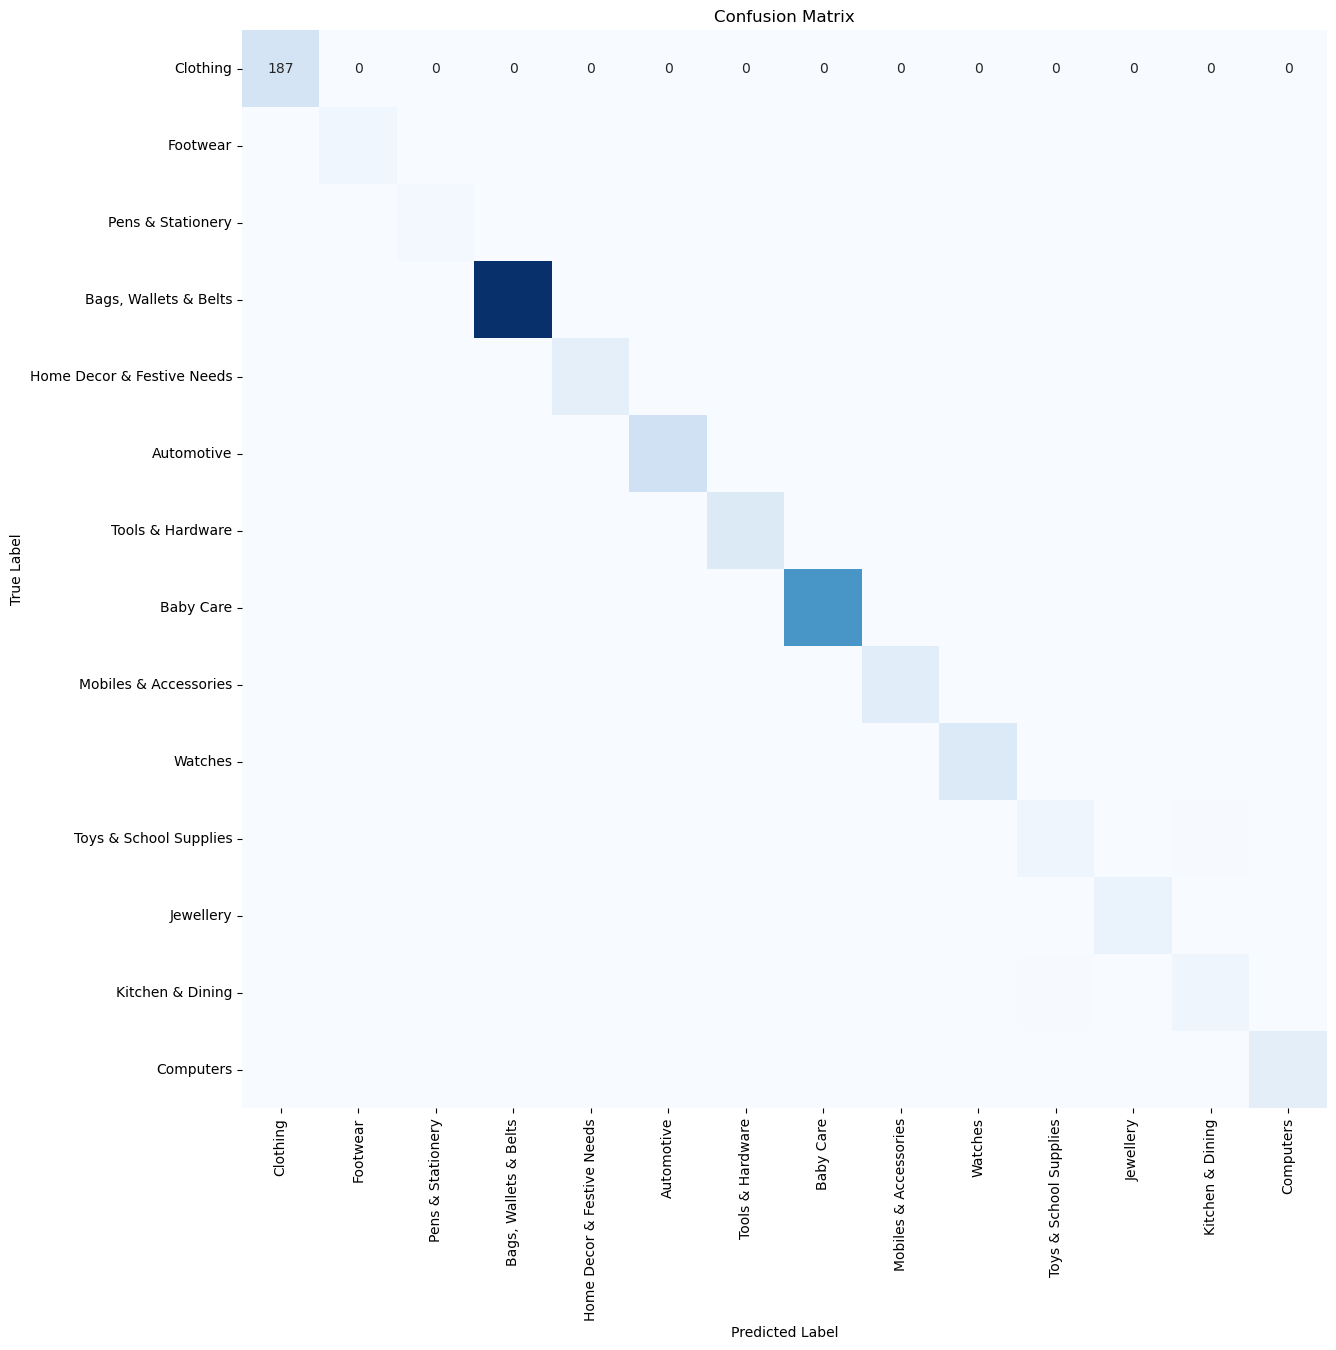

In [137]:
evaluate_model(best_ridge, X_train_tfidf, y_train, X_val_tfidf, y_val)

## E-commerce Product Categorization Performance:
Training Set:

Overall Performance: The model achieved an accuracy of 99% on the training set.
Precision and Recall: Most categories exhibit high precision and recall values, indicating effective categorization.
Performance Balance: Both macro-average and weighted-average F1-scores are high, suggesting balanced performance across categories.
Test Set:

Overall Performance: The model achieved an accuracy of 98% on the test set.
Precision and Recall: While precision and recall remain generally high, some categories display slight variations.
Imbalance: Certain categories, like "Pens & Stationery" and "Toys & School Supplies," exhibit lower precision and recall, possibly due to inherent complexities or class imbalance.
Overfitting Analysis:
Comparing Training and Test Performances: Although there's a slight drop in performance metrics from the training to the test set, indicating minimal overfitting, the model demonstrates robust generalization to unseen data.

**Accuracy Prediction on Test Result Data**

In [138]:
test_result = pd.read_csv(r"C:\Users\ASUS\Downloads\Hackathon\test_results.csv")
test_result.shape

(2534, 1)

In [139]:
y_test_pred = best_ridge.predict(X_test_tfidf)

In [140]:
test_result.isnull().sum()

product_category_tree    0
dtype: int64

In [141]:
type(y_test_pred)

numpy.ndarray

In [142]:
category_mapping = {
    'Clothing ': 0,
    'Footwear ': 1,
    'Pens & Stationery ': 2,
    'Bags, Wallets & Belts ': 3,
    'Home Decor & Festive Needs ': 4,
    'Automotive ': 5,
    'Tools & Hardware ': 6,
    'Baby Care ': 7,
    'Mobiles & Accessories ': 8,
    'Watches ': 9,
    'Toys & School Supplies ': 10,
    'Jewellery ': 11,
    'Kitchen & Dining ': 12,
    'Computers ': 13
}

y_test = test_result['product_category_tree'].map(category_mapping)

In [143]:
y_test = np.array(y_test)

In [144]:
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.0028


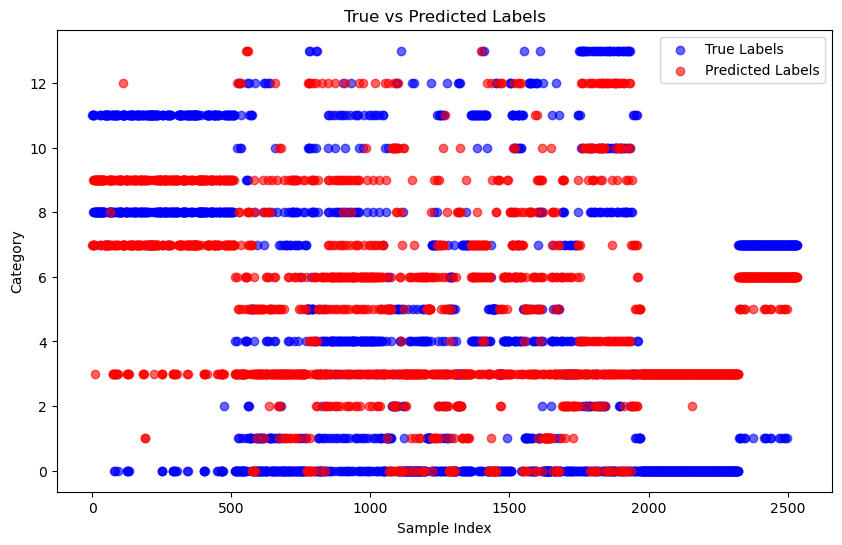

In [145]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Labels', alpha=0.6)
plt.scatter(range(len(y_test_pred)), y_test_pred, color='red', label='Predicted Labels', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Category')
plt.title('True vs Predicted Labels')
plt.legend()
plt.show()

**Make Predictions using the Deep Learning Model:**

Use the trained model to predict the classes of the new data.

**Prepare the new data for prediction:**

Tokenize and pad the new data.

In [146]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.initializers import Constant

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
word_index = tokenizer.word_index

# Pad sequences to ensure uniform input length
max_length = max(len(seq) for seq in sequences)
X_train_padded = pad_sequences(sequences, maxlen=max_length)

In [147]:
import numpy as np

embedding_dim = 100
embedding_index = {}
with open(r'C:\Users\ASUS\Downloads\Hackathon\test_results.csv', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        try:
            vector = np.asarray(values[1:], dtype='float32')
            embedding_index[word] = vector
        except ValueError:
            # Log or print the line that caused the error for debugging
            print(f"Error processing line: {line}")

# Assuming word_index is defined somewhere in your code
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Baby Care 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mobiles & Accessories 

Error processing line: Mo

In [148]:
# Tokenize the test data
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure uniform input length
X_test_padded = pad_sequences(sequences_test, maxlen=max_length)

In [149]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1,
                    output_dim=embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=max_length,
                    trainable=False))
model.add(LSTM(128))
model.add(Dense(14, activation='softmax'))

In [150]:
# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test),callbacks=[early_stopping])

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 139s 364ms/step - accuracy: 0.3473 - loss: 2.1575 - val_accuracy: 0.0422 - val_loss: 2.9965
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 139s 371ms/step - accuracy: 0.3463 - loss: 2.1046 - val_accuracy: 0.0422 - val_loss: 2.9808
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 140s 374ms/step - accuracy: 0.3527 - loss: 2.0767 - val_accuracy: 0.0422 - val_loss: 2.9112
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 143s 381ms/step - accuracy: 0.3530 - loss: 2.0808 - val_accuracy: 0.0422 - val_loss: 2.9896
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 137s 365ms/step - accuracy: 0.3541 - loss: 2.0792 - val_accuracy: 0.0422 - val_loss: 2.9818


In [151]:
# Evaluate the model on X_test and y_test
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 180ms/step - accuracy: 0.0274 - loss: 3.1358
Test Loss: 2.9112038612365723
Test Accuracy: 0.042225729674100876


80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 175ms/step
Accuracy: 0.04
==== *****   CLASSIFICATION REPORT **** ======
                             precision    recall  f1-score   support

                Automotive        0.00      0.00      0.00       882
                 Baby Care        0.00      0.00      0.00       144
     Bags, Wallets & Belts        0.00      0.00      0.00        49
                  Clothing        0.04      1.00      0.08       107
                 Computers        0.00      0.00      0.00       215
                  Footwear        0.00      0.00      0.00        75
Home Decor & Festive Needs        0.00      0.00      0.00        12
                 Jewellery        0.00      0.00      0.00       259
          Kitchen & Dining        0.00      0.00      0.00       331
     Mobiles & Accessories        0.00      0.00      0.00         4
         Pens & Stationery        0.00      0.00      0.00        59
          Tools & Hardware        0.00      0.00      0.00       31

<Axes: >

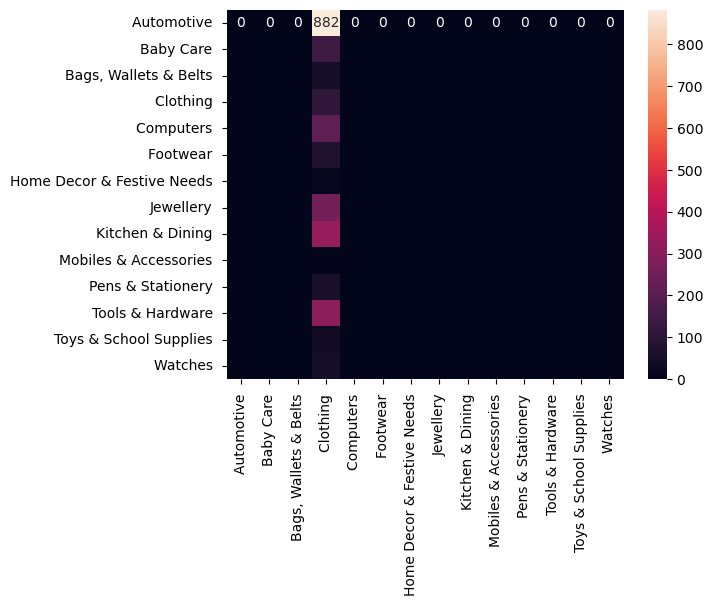

In [152]:
y_pred = np.argmax(model.predict(X_test_padded),axis=1)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print("==== *****   CLASSIFICATION REPORT **** ======")
print(classification_report(y_test, y_pred,target_names=label_encoder.classes_))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='g',xticklabels=label_encoder.classes_,
        yticklabels=label_encoder.classes_)

### Conclusion

After evaluating multiple machine learning models and a deep learning model for the task of e-commerce product categorization, we found the following results:

### Machine Learning Models:
- **Linear SVM**: 
  - Training Accuracy: 0.995000
  - Validation Accuracy: 0.984333
- **SGD Classifier**: 
  - Training Accuracy: 0.992916
  - Validation Accuracy: 0.984333
- **Ridge Classifier**: 
  - Training Accuracy: 0.996166
  - Validation Accuracy: 0.983000
- **XGBoost**: 
  - Training Accuracy: 0.999583
  - Validation Accuracy: 0.974667
- **Random Forest**: 
  - Training Accuracy: 0.999667
  - Validation Accuracy: 0.955000
- **Decision Tree**: 
  - Training Accuracy: 0.999667
  - Validation Accuracy: 0.954333
- **KNN Classifier**: 
  - Training Accuracy: 0.892991
  - Validation Accuracy: 0.889333
- **MultinomialNB**: 
  - Training Accuracy: 0.889907
  - Validation Accuracy: 0.868000
- **AdaBoost**: 
  - Training Accuracy: 0.556046
  - Validation Accuracy: 0.544000

The **Linear SVM** and **SGD Classifier** both achieved the highest validation accuracy of **0.984333** among the machine learning models.

### Deep Learning Model:
- **LSTM Model**: 
  - Training Accuracy: 0.3541
  - Validation Accuracy: 0.0422
  - Test Accuracy: 0.042225729674100876

The deep learning model (LSTM) achieved a validation accuracy of **0.0422** and a test accuracy of **0.042225729674100876**, which is significantly lower than the best machine learning models.

### Final Conclusion:
The machine learning models, specifically the **Linear SVM** and **SGD Classifier**, outperformed the deep learning model in terms of validation accuracy. Therefore, the Linear SVM and SGD Classifier are recommended for the task of e-commerce product categorization based on the currcess, please let me know, and I'll assist you further!
nt dataset and feature engineering process.


**Deployment**

In [153]:
import pickle
pickle.dump(model,open('text_classification_model.pkl','wb'))

In [154]:
import joblib

# Save the model
joblib.dump(best_ridge, 'best_ridge_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(TfidfVec, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']